In [1]:
!pip install -U scikit-survival

     |████████████████████████████████| 2.5 MB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-survival: filename=scikit_survival-0.17.1-cp37-cp37m-linux_x86_64.whl size=4088347 sha256=eb4336b70736592699e7ccb0ca6c224ce741f0eb343c4a37edccf3f881f6209b
  Stored in directory: /root/.cache/pip/wheels/78/43/46/b5c9ba2d44e7e5de3d321c76bbff4e5480cd69d486b38d359f
Successfully built scikit-survival


In [2]:
pip install lifelines

     |████████████████████████████████| 348 kB 7.9 MB/s 
     |████████████████████████████████| 55 kB 4.9 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=3f2e9c05a574cada5e462eaf2084e3115be1c7c364b73666b274282eb14737e6
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [3]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
# Read datasets needed
from google.colab import files 
uploaded = files.upload()

Saving 0227_X_y_imputed_whole.csv to 0227_X_y_imputed_whole.csv


In [5]:
import io
df_train = pd.read_csv(io.BytesIO(uploaded['0227_X_y_imputed_whole.csv']))

In [6]:
df_train.drop(columns=['Unnamed: 0'], inplace = True)
print(df_train)

      SubjectID   Age  Gender  diag_delta  onset_delta  onset_site  \
0         348.0   7.0     0.0   -9.928767   -16.471233         0.0   
1         533.0  10.0     0.0   -1.446575   -33.632877         1.0   
2         902.0  12.0     0.0   -1.610959   -16.898630         0.0   
3        1736.0   5.0     1.0  -16.800000   -18.739726         0.0   
4        3971.0   8.0     0.0  -12.427397   -25.084932         0.0   
...         ...   ...     ...         ...          ...         ...   
2822   998542.0  11.0     1.0   -2.400000    -9.435616         0.0   
2823   998756.0   9.0     1.0   -7.923288   -20.120548         1.0   
2824   999166.0   9.0     1.0   -1.610959   -32.843836         1.0   
2825   999823.0   8.0     1.0   -2.761644   -16.175342         0.0   
2826   999990.0   9.0     0.0   -8.876712   -10.882192         0.0   

      diag_minus_onset    mean_fvc  mean_Creatinine  mean_weight  ...  \
0             6.542466   70.157760        53.040000   120.033333  ...   
1            

In [7]:
df_train # 2827 subjects

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,mean_fvc,mean_Creatinine,mean_weight,...,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_R1_Dyspnea,slope_R2_Orthopnea,slope_R3_Respiratory_Insufficiency,slope_bulbar,slope_motor,slope_respiratory,time_opt,status_opt
0,348.0,7.0,0.0,-9.928767,-16.471233,0.0,6.542466,70.157760,53.040000,120.033333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.497512,0.000000,13.18,0
1,533.0,10.0,0.0,-1.446575,-33.632877,1.0,32.186301,73.500000,79.560000,51.000000,...,0.334448,0.334448,0.000000,0.000000,0.000000,-0.334448,0.334448,0.000000,9.44,1
2,902.0,12.0,0.0,-1.610959,-16.898630,0.0,15.287671,89.600000,58.204386,62.220000,...,-0.362319,0.000000,-0.362319,0.000000,0.000000,0.362319,-1.086957,-0.362319,5.06,0
3,1736.0,5.0,1.0,-16.800000,-18.739726,0.0,1.939726,71.000000,58.400000,121.400000,...,-0.632911,0.000000,0.632911,0.000000,0.000000,-0.632911,-1.898734,0.632911,8.02,1
4,3971.0,8.0,0.0,-12.427397,-25.084932,0.0,12.657534,86.000000,53.040000,88.900000,...,-0.080400,-0.133462,-0.067174,-0.043216,-0.019409,-0.095040,-0.630737,-0.129774,12.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,998542.0,11.0,1.0,-2.400000,-9.435616,0.0,7.035616,85.000000,53.040000,72.400000,...,-0.080372,-0.133328,-0.067473,-0.042912,-0.019622,-0.095156,-0.630606,-0.129981,0.26,0
2823,998756.0,9.0,1.0,-7.923288,-20.120548,1.0,12.197260,73.333333,88.400000,70.200000,...,0.000000,0.000000,0.000000,0.000000,1.069519,0.000000,0.000000,1.069519,2.10,0
2824,999166.0,9.0,1.0,-1.610959,-32.843836,1.0,31.232877,75.000000,83.980000,84.750000,...,-0.080250,-0.133307,-0.067436,-0.043003,-0.019727,-0.094630,-0.630937,-0.130134,12.82,0
2825,999823.0,8.0,1.0,-2.761644,-16.175342,0.0,13.413699,100.800000,74.400987,70.460000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.743494,0.000000,0.000000,6.05,0


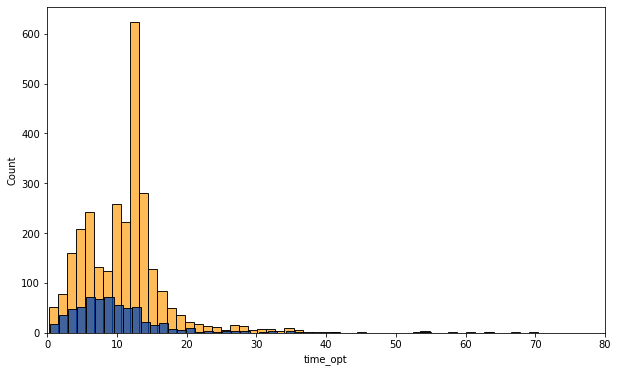

In [8]:
plt.figure(figsize=(10,6))
plt.xlim([0,80])

sns.histplot(df_train['time_opt'], binwidth=1.3, color='#FEA41F')
sns.histplot(df_train[df_train['status_opt']==1]['time_opt'], binwidth=1.3, color='#0244B1')

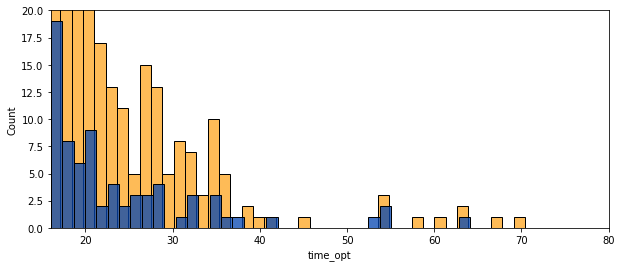

In [9]:
plt.figure(figsize=(10,4))
plt.xlim([16,80])
plt.ylim([0,20])

sns.histplot(df_train['time_opt'], binwidth=1.3, color='#FEA41F')
sns.histplot(df_train[df_train['status_opt']==1]['time_opt'], binwidth=1.3, color='#0244B1')


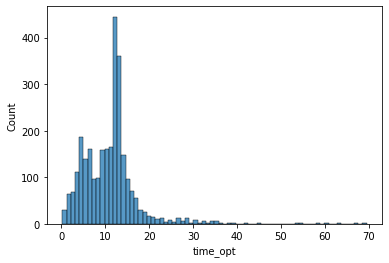

In [10]:
sns.histplot(df_train['time_opt'])

## 1. Fitting survival models

##1) Accelarated Failure Time model

In [11]:
aft_final_feature_list = ['Age',  'diag_delta', 'onset_delta', 'onset_site', 'mean_fvc', 'slope_weight', 'mean_ALSFRS_R_Total', 'mean_bulbar', 'mean_respiratory', 'slope_ALSFRS_R_Total', 'slope_bulbar', 'slope_respiratory']

### (1) Fitting AFT model

In [12]:
from lifelines import WeibullAFTFitter

aft = WeibullAFTFitter(penalizer = 0.01, l1_ratio = 1)
aft.fit(df_train[aft_final_feature_list+['time_opt', 'status_opt']], duration_col='time_opt', event_col='status_opt', ancillary=False)

aft.print_summary() # Prints accelerated failure rate & p-value of each feature

<lifelines.WeibullAFTFitter: fitted with 2827 total observations, 2198 right-censored observations>
             duration col = 'time_opt'
                event col = 'status_opt'
                penalizer = 0.01
   number of observations = 2827
number of events observed = 629
           log-likelihood = -2517.63
         time fit was run = 2022-03-06 00:50:40 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                    
lambda_ Age                   -0.06       0.94       0.01            -0.08            -0.04                 0.92                 0.96
        diag_delta            -0.01       0.99       0.00            -0.02             0.00                 0.98                 1.00
        mean_ALSFRS_R_Total    0.01       1.01       0.00             0.00             0.02                 1.00                 1.02
        mean_bulbar            0.26       1.30       0.02             0.23             0.30                 1.25                 1.35
        mean_fvc               0.01       1.01       0.00             0.00             0.01                 1.00                 1.01
        mean_respiratory      -0.01       0.99       0.02            -0.05             0.02                 0.95                 1.02
        onset_delta           -0.01       0.99       0.00            -0.02            -0.01                 0.98                 0.99
        onset_site            -0.10       0.91       0.06            -0.22             0.02                 0.81                 1.02
        slope_ALSFRS_R_Total   0.07       1.07       0.02             0.04             0.11                 1.04                 1.11
        slope_bulbar           0.22       1.25       0.05             0.12             0.32                 1.13                 1.37
        slope_respiratory     -0.02       0.98       0.04            -0.10             0.06                 0.91                 1.06
        slope_weight           0.06       1.07       0.01             0.04             0.08                 1.04                 1.09
        Intercept              1.23       3.43       0.21             0.81             1.65                 2.26                 5.21
rho_    Intercept              0.72       2.05       0.03             0.66             0.77                 1.94                 2.17

                                 z      p   -log2(p)
param   covariate                                   
lambda_ Age                  -6.81 <0.005      36.54
        diag_delta           -1.91   0.06       4.15
        mean_ALSFRS_R_Total   2.34   0.02       5.70
        mean_bulbar          13.84 <0.005     142.29
        mean_fvc              4.04 <0.005      14.20
        mean_respiratory     -0.69   0.49       1.03
        onset_delta          -3.96 <0.005      13.73
        onset_site           -1.59   0.11       3.15
        slope_ALSFRS_R_Total  4.19 <0.005      15.12
        slope_bulbar          4.49 <0.005      17.10
        slope_respiratory    -0.48   0.63       0.67
        slope_weight          6.03 <0.005      29.19
        Intercept             5.77 <0.005      26.94
rho_    Intercept            25.59 <0.005     477.20
---
Concordance = 0.86
AIC = 5063.25
log-likelihood ratio test = 949.05 on 12 df
-log2(p) of ll-ratio test = 647.04

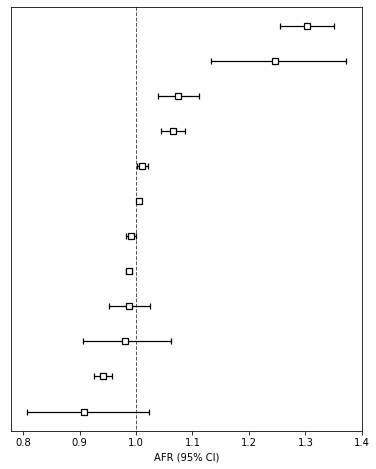

In [ ]:
# Print 95% CI AFRs in a plot
from lifelines import utils
from numpy import exp

plt.figure(figsize=(6.3,7.8))
ax = plt.gca()

z = utils.inv_normal_cdf(1 - aft.alpha / 2)
columns = [ ('lambda_',        'mean_bulbar'),
            ('lambda_',       'slope_bulbar'),
            ('lambda_',    'slope_ALSFRS_R_Total'),
            ('lambda_',       'slope_weight'),
            ('lambda_',    'mean_ALSFRS_R_Total'),
            ('lambda_',    'mean_fvc'),
            ('lambda_',      'diag_delta'),
            ('lambda_',       'onset_delta'),
           ('lambda_',       'mean_respiratory'),
           ('lambda_',       'slope_respiratory'),
           ('lambda_',             'Age'),
           ('lambda_',           'onset_site')]

yaxis_locations = list(range(len(columns)))
log_afr = aft.params_.loc[columns].values.copy()

order = list(range(len(columns) - 1, -1, -1))

afr = exp(log_afr)
upper_errors = afr * (exp(z * aft.standard_errors_[columns].values) - 1)
lower_errors = afr * (1 - exp(-z * aft.standard_errors_[columns].values))
ax.errorbar(
      afr[order],
      yaxis_locations,
      xerr=np.vstack([lower_errors[order], upper_errors[order]]),
      c = "k",
      fmt = "s",
      markerfacecolor = 'white',
      markeredgewidth = 1.25,
      elinewidth = 1.25,
      capsize = 3   
)

ax.set_xlabel("AFR (%g%% CI)" % ((1 - aft.alpha) * 100))

best_ylim = ax.get_ylim()
ax.vlines(1 , -2, len(columns) + 1, linestyles="dashed", linewidths=1, alpha=0.65, color="k")
ax.set_ylim(best_ylim)

tick_labels = [columns[i] for i in order]

ax.set_yticks(yaxis_locations)
ax.set_yticklabels(tick_labels)
ax.yaxis.set_visible(False)

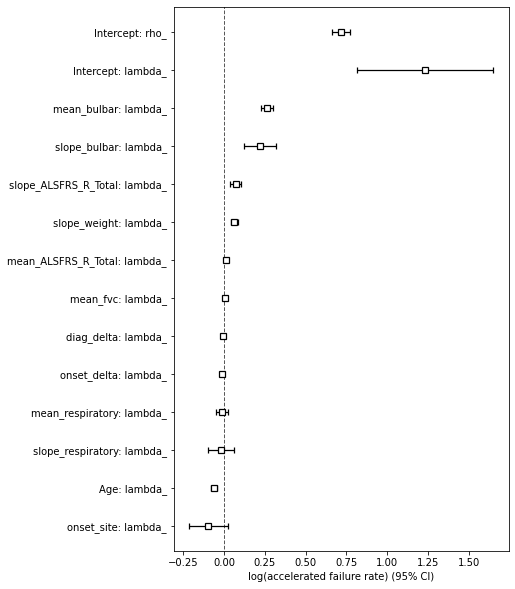

In [ ]:
from matplotlib import pyplot as plt

aft = WeibullAFTFitter(penalizer = 0.01, l1_ratio = 1).fit(df_train[aft_final_feature_list+['time_opt', 'status_opt']], 'time_opt', 'status_opt', ancillary=False)
plt.figure(figsize=(6,10))
aft.plot() # Print 95% CI log(AFR) in a plot

## 2) Cox Proportional Hazard Model

In [13]:
cph_final_feature_list = ['Age',  'diag_delta', 'onset_delta', 'onset_site', 'mean_fvc', 'slope_weight', 'mean_ALSFRS_R_Total', 'mean_bulbar', 'slope_ALSFRS_R_Total', 'slope_bulbar']

### (1) Fitting CoxPH model

In [14]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.01, l1_ratio = 1)
cph.fit(df_train[cph_final_feature_list+['time_opt', 'status_opt']], 'time_opt', event_col='status_opt')
cph.print_summary() # Prints hazard ratio & p-value of each feature

<lifelines.CoxPHFitter: fitted with 2827 total observations, 2198 right-censored observations>
             duration col = 'time_opt'
                event col = 'status_opt'
                penalizer = 0.01
                 l1 ratio = 1
      baseline estimation = breslow
   number of observations = 2827
number of events observed = 629
   partial log-likelihood = -4021.37
         time fit was run = 2022-03-06 00:51:15 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
Age                    0.10       1.11       0.02             0.06             0.14                 1.07                 1.15
diag_delta             0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
onset_delta            0.02       1.02       0.01             0.01             0.04                 1.01                 1.04
onset_site             0.16       1.17       0.12            -0.08             0.40                 0.92                 1.50
mean_fvc              -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
slope_weight          -0.12       0.89       0.02            -0.16            -0.07                 0.85                 0.93
mean_ALSFRS_R_Total   -0.02       0.98       0.01            -0.03            -0.00                 0.97                 1.00
mean_bulbar           -0.54       0.58       0.04            -0.62            -0.47                 0.54                 0.62
slope_ALSFRS_R_Total  -0.13       0.88       0.03            -0.19            -0.08                 0.83                 0.93
slope_bulbar          -0.48       0.62       0.10            -0.68            -0.29                 0.51                 0.75

                          z      p   -log2(p)
covariate                                    
Age                    5.42 <0.005      24.01
diag_delta             1.06   0.29       1.79
onset_delta            3.85 <0.005      13.05
onset_site             1.29   0.20       2.35
mean_fvc              -3.36 <0.005      10.35
slope_weight          -5.27 <0.005      22.83
mean_ALSFRS_R_Total   -2.11   0.04       4.84
mean_bulbar          -14.29 <0.005     151.54
slope_ALSFRS_R_Total  -4.58 <0.005      17.69
slope_bulbar          -4.91 <0.005      20.08
---
Concordance = 0.86
Partial AIC = 8062.74
log-likelihood ratio test = 912.08 on 10 df
-log2(p) of ll-ratio test = 627.17

In [ ]:
# Testing proportional-hazard assumption
print(cph.check_assumptions(df_train[cph_final_feature_list+['time_opt', 'status_opt']]))
# Variable 'mean_bulbar' failed the non-proportional test: p-value is <5e-05.
# Variable 'slope_bulbar' failed the non-proportional test: p-value is <5e-05.

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



/usr/local/lib/python3.7/dist-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 2827 total observations, 2198 right-censored observations>
         test_name = proportional_hazard_test

---
                           test_statistic      p  -log2(p)
Age                  km              0.80   0.37      1.43
                     rank            0.08   0.78      0.35
diag_delta           km              0.10   0.75      0.41
                     rank            0.26   0.61      0.71
mean_ALSFRS_R_Total  km              3.18   0.07      3.74
                     rank            0.61   0.43      1.20
mean_bulbar          km              9.46 <0.005      8.89
                     rank           21.32 <0.005     17.97
mean_fvc             km              1.68   0.19      2.36
                     rank            0.24   0.62      0.69
onset_delta          km              0.00   0.98      0.03
                     rank            0.63   0.43      1.23
onset_site           km              0.78   0.38      1.40
                     rank            2.87   0.09      3.47
slope_ALSFRS_R_Total km              0.01   0.93      0.11
                     rank            0.07   0.78      0.35
slope_bulbar         km             13.91 <0.005     12.35
                     rank           20.85 <0.005     17.62
slope_weight         km              3.56   0.06      4.08
                     rank            3.32   0.07      3.87



1. Variable 'mean_bulbar' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'mean_bulbar' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'mean_bulbar' using pd.cut, and then specify it in
`strata=['mean_bulbar', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'slope_bulbar' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'slope_bulbar' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to 

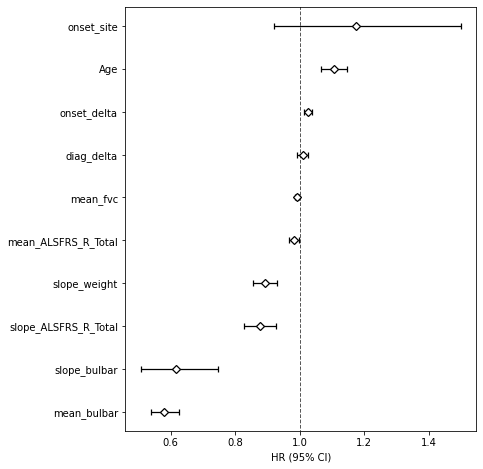

In [ ]:
# Print 95% CI Hazard ratios in a plot
plt.figure(figsize = (6.3,7.8))
ax = cph.plot(hazard_ratios=True, c='k', marker='D')
ax.yaxis.set_visible(True) #HR >1, or log(HR)>0 means that a feature increases the risk of event occurence

## 3) Random Survival Forest model

In [15]:
rsf_final_feature_list = ['Age', 'onset_delta', 'onset_site', 'mean_fvc', 'slope_weight', 'mean_ALSFRS_R_Total', 'mean_bulbar', 'mean_motor','slope_ALSFRS_R_Total', 'slope_bulbar']

In [16]:
from sksurv.ensemble import RandomSurvivalForest

In [62]:
# Random Survival Forests requires array-type data, thus additional preprocessing was needed
dic = {1:True, 0:False}

df_train_rsf = df_train[['status_opt', 'time_opt']]
df_train_rsf = df_train_rsf.replace({'status_opt':dic})

In [63]:
arr_1 = list(tuple(x) for x in df_train_rsf.to_records(index=False))
dt = np.dtype('bool, float')
y_train_rsf = np.array(arr_1, dtype=dt)
y_train_rsf.dtype.names=['cens', 'time']
y_train_rsf

array([(False, 13.18), ( True,  9.44), (False,  5.06), ...,
       (False, 12.82), (False,  6.05), (False,  4.14)],
      dtype=[('cens', '?'), ('time', '<f8')])

###(1) Fitting RSF model

In [64]:
#52초 소요
rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=8,
                           min_samples_leaf=14,
                           max_features="auto",
                           n_jobs=-1,
                           random_state=20)
rsf.fit(df_train[rsf_final_feature_list], y_train_rsf)

RandomSurvivalForest(min_samples_leaf=14, min_samples_split=8, n_jobs=-1,
                     random_state=20)

In [65]:
rsf.score(df_train[rsf_final_feature_list], y_train_rsf)

0.9086562683535224

In [66]:
feature_names = df_train[rsf_final_feature_list].columns.tolist()
feature_names 

['Age',
 'onset_delta',
 'onset_site',
 'mean_fvc',
 'slope_weight',
 'mean_ALSFRS_R_Total',
 'mean_bulbar',
 'mean_motor',
 'slope_ALSFRS_R_Total',
 'slope_bulbar']

In [67]:
pip install eli5

     |████████████████████████████████| 106 kB 8.9 MB/s 


In [68]:
#3분 50초 소요
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rsf, n_iter=15, random_state=20)
perm.fit(df_train[rsf_final_feature_list], y_train_rsf)

PermutationImportance(estimator=RandomSurvivalForest(min_samples_leaf=14,
                                                     min_samples_split=8,
                                                     n_jobs=-1,
                                                     random_state=20),
                      n_iter=15, random_state=20)

In [76]:
data = perm.results_
data = pd.DataFrame(data, columns=rsf_final_feature_list)
means = data.mean()
means = means.sort_values(ascending=False)
data = data[means.index]
data = np.transpose(data)

In [77]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
mean_bulbar,0.114703,0.115721,0.113328,0.114924,0.114961,0.116042,0.110613,0.114301,0.116488,0.110365,0.112034,0.115586,0.115083,0.116591,0.109103
mean_ALSFRS_R_Total,0.025955,0.024046,0.021882,0.025058,0.026138,0.022508,0.023156,0.025621,0.025216,0.023671,0.022393,0.026642,0.026066,0.023929,0.023918
onset_delta,0.016404,0.017948,0.015166,0.015516,0.016680,0.014540,0.016871,0.015350,0.014782,0.015801,0.016520,0.018894,0.016317,0.018237,0.015425
mean_fvc,0.017776,0.014578,0.016005,0.012934,0.016851,0.013989,0.017289,0.017232,0.015544,0.017410,0.015406,0.015108,0.016336,0.015743,0.018050
onset_site,0.016232,0.017250,0.014999,0.016527,0.015546,0.013311,0.018161,0.017001,0.016691,0.015458,0.015205,0.014417,0.013106,0.016560,0.017309
slope_ALSFRS_R_Total,0.015374,0.015994,0.015712,0.015897,0.011503,0.014228,0.013749,0.013330,0.015413,0.014708,0.015891,0.015249,0.016638,0.014581,0.014425
slope_weight,0.012225,0.013440,0.011220,0.014012,0.013033,0.013816,0.013160,0.014148,0.014966,0.012595,0.012569,0.013558,0.012487,0.013584,0.012505
Age,0.012521,0.009474,0.010748,0.012638,0.010227,0.010412,0.011711,0.007242,0.011694,0.012044,0.011110,0.010441,0.010869,0.010041,0.011572
slope_bulbar,0.008814,0.010118,0.009998,0.009968,0.011001,0.010617,0.010370,0.009884,0.009735,0.010241,0.011036,0.011348,0.010974,0.009880,0.010891
mean_motor,0.007288,0.006906,0.007115,0.007047,0.007003,0.007436,0.007786,0.007129,0.007574,0.007163,0.006811,0.008178,0.006239,0.007113,0.007224


In [78]:
data['50%'] = data.quantile(0.5, axis = 1)
data['75%'] = data.quantile(0.75, axis = 1)
data['25%'] = data.quantile(0.25, axis = 1)
data['std'] = data.std(axis=1)
data[['50%','75%','25%', 'std']]

,50%,75%,25%,std
mean_bulbar,0.114924,0.115620,0.113328,0.002207
mean_ALSFRS_R_Total,0.024046,0.025704,0.023671,0.001430
onset_delta,0.016317,0.016728,0.015425,0.001185
mean_fvc,0.016005,0.017246,0.015406,0.001374
onset_site,0.016232,0.016769,0.015205,0.001358
slope_ALSFRS_R_Total,0.015249,0.015757,0.014425,0.001205
slope_weight,0.013160,0.013642,0.012569,0.000861
Age,0.010869,0.011698,0.010412,0.001253
slope_bulbar,0.010241,0.010912,0.009968,0.000624
mean_motor,0.007129,0.007325,0.007047,0.000405


In [72]:
Feat_imp = data[['50%','75%','25%']].transpose()
Feat_imp.columns = list(data.index)
Feat_imp

,mean_bulbar,mean_ALSFRS_R_Total,onset_delta,mean_fvc,onset_site,slope_ALSFRS_R_Total,slope_weight,Age,slope_bulbar,mean_motor
50%,0.114924,0.024046,0.016317,0.016005,0.016232,0.015249,0.013160,0.010869,0.010241,0.007129
75%,0.115620,0.025704,0.016728,0.017246,0.016769,0.015757,0.013642,0.011698,0.010912,0.007325
25%,0.113328,0.023671,0.015425,0.015406,0.015205,0.014425,0.012569,0.010412,0.009968,0.007047


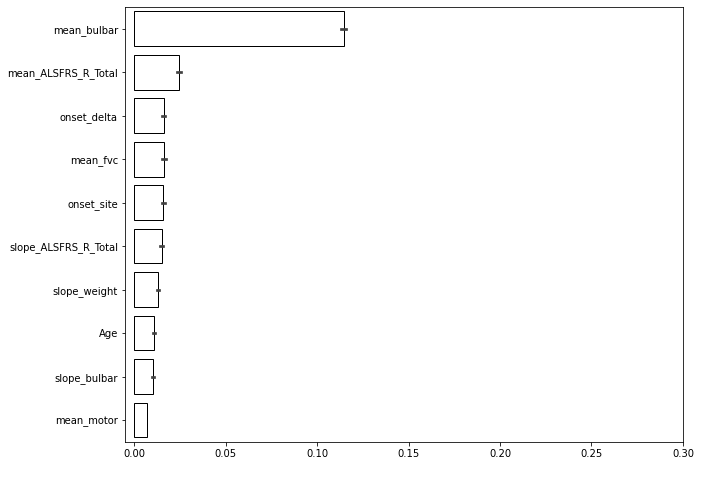

In [75]:
df = pd.DataFrame(data=Feat_imp, columns=list(data.index))

import matplotlib
matplotlib.rc('axes',edgecolor='k')

fig, ax = plt.subplots()
ax.grid(False)
fig.set_size_inches(10, 8)
sns.barplot(x="value", y="variable", data=pd.melt(df), color='white', edgecolor='k', dodge=False)
ax.set_xlabel(' ')
ax.set_xlim([-0.005,0.3])
ax.set_ylabel('')
ax.yaxis.set_visible(True)

## 2. Evaluating model performances

## 1) Repeated 5-fold cross validation on Training set

### (1) Accelerated Failure Time

In [ ]:
from lifelines.utils import concordance_index

In [ ]:
from lifelines import WeibullAFTFitter
aft = WeibullAFTFitter(penalizer = 0.01, l1_ratio = 1)
C_Idx1 = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]

for i in random_num_list:
    df_train_aft = df_train[aft_final_feature_list+['time_opt', 'status_opt']].sample(n=len(df_train), random_state=i)
    
    aft.fit(df_train_aft.iloc[0:2261,:], 'time_opt', event_col='status_opt')
    sco_1 = concordance_index(df_train_aft.iloc[2261:,:]['time_opt'], aft.predict_median(df_train_aft.iloc[2261:,:]), df_train_aft.iloc[2261:,:]['status_opt'])
    
    aft.fit(df_train_aft.iloc[565:,:], 'time_opt', event_col='status_opt')
    sco_2 = concordance_index(df_train_aft.iloc[0:565,:]['time_opt'], aft.predict_median(df_train_aft.iloc[0:565,:]), df_train_aft.iloc[0:565,:]['status_opt'])

    aft.fit(pd.concat([df_train_aft.iloc[0:565],df_train_aft.iloc[1130:]]), 'time_opt', event_col='status_opt')
    sco_3 = concordance_index(df_train_aft.iloc[565:1130,:]['time_opt'], aft.predict_median(df_train_aft.iloc[565:1130,:]), df_train_aft.iloc[565:1130,:]['status_opt'])

    aft.fit(pd.concat([df_train_aft.iloc[0:1130],df_train_aft.iloc[1695:]]), 'time_opt', event_col='status_opt')
    sco_4 = concordance_index(df_train_aft.iloc[1130:1695,:]['time_opt'], aft.predict_median(df_train_aft.iloc[1130:1695,:]), df_train_aft.iloc[1130:1695,:]['status_opt'])

    aft.fit(pd.concat([df_train_aft.iloc[0:1695],df_train_aft.iloc[2261:]]), 'time_opt', event_col='status_opt')
    sco_5 = concordance_index(df_train_aft.iloc[1695:2261,:]['time_opt'], aft.predict_median(df_train_aft.iloc[1695:2261,:]), df_train_aft.iloc[1695:2261,:]['status_opt'])
    
    C_Idx1 = np.append (C_Idx1, [sco_1, sco_2, sco_3, sco_4, sco_5])
print(C_Idx1)

[0.86362423 0.86132612 0.87160092 0.86107433 0.85180585 0.85171963
 0.86245844 0.84062872 0.87124329 0.87009216 0.87102564 0.84693148
 0.86301611 0.86785859 0.8551562  0.86594937 0.85361437 0.85188074
 0.87283252 0.85420992 0.8519009  0.87420809 0.83090474 0.88398693
 0.85808135 0.86045161 0.85187476 0.83788036 0.88286245 0.86399307
 0.88395056 0.86422663 0.8486028  0.84042919 0.86960688 0.86636843
 0.8670641  0.83742355 0.86541128 0.8660001  0.8706485  0.82555111
 0.88325721 0.85262536 0.87031454 0.86556064 0.84117662 0.86867271
 0.85561485 0.8657689 ]


### (2) Cox proportional hazard model

In [ ]:
# 5-fold cross validation is repeated 10 times, 50 C-index values are returned as a result
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer = 0.01, l1_ratio = 1)
C_Idx2 = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]

for i in random_num_list:
    df_train_cox = df_train[cph_final_feature_list+['time_opt','status_opt']].sample(n=len(df_train), random_state=i)
    
    cph.fit(df_train_cox.iloc[0:2261,:], 'time_opt', event_col='status_opt')
    sco_1 = concordance_index(df_train_cox.iloc[2261:,:]['time_opt'], -cph.predict_partial_hazard(df_train_cox.iloc[2261:,:]), df_train_cox.iloc[2261:,:]['status_opt'])
    
    cph.fit(df_train_cox.iloc[565:,:], 'time_opt', event_col='status_opt')
    sco_2 = concordance_index(df_train_cox.iloc[0:565,:]['time_opt'], -cph.predict_partial_hazard(df_train_cox.iloc[0:565,:]), df_train_cox.iloc[0:565,:]['status_opt'])

    cph.fit(pd.concat([df_train_cox.iloc[0:565],df_train_cox.iloc[1130:]]), 'time_opt', event_col='status_opt')
    sco_3 = concordance_index(df_train_cox.iloc[565:1130,:]['time_opt'], -cph.predict_partial_hazard(df_train_cox.iloc[565:1130,:]), df_train_cox.iloc[565:1130,:]['status_opt'])

    cph.fit(pd.concat([df_train_cox.iloc[0:1130],df_train_cox.iloc[1695:]]), 'time_opt', event_col='status_opt')
    sco_4 = concordance_index(df_train_cox.iloc[1130:1695,:]['time_opt'], -cph.predict_partial_hazard(df_train_cox.iloc[1130:1695,:]), df_train_cox.iloc[1130:1695,:]['status_opt'])

    cph.fit(pd.concat([df_train_cox.iloc[0:1695],df_train_cox.iloc[2261:]]), 'time_opt', event_col='status_opt')
    sco_5 = concordance_index(df_train_cox.iloc[1695:2261,:]['time_opt'], -cph.predict_partial_hazard(df_train_cox.iloc[1695:2261,:]), df_train_cox.iloc[1695:2261,:]['status_opt'])
    
    C_Idx2 = np.append (C_Idx2, [sco_1, sco_2, sco_3, sco_4, sco_5])

print(C_Idx2)

[0.86264519 0.86400727 0.87198741 0.85727843 0.85127006 0.84979045
 0.86224622 0.83903257 0.86929007 0.87329041 0.87510684 0.84640605
 0.86093704 0.86593281 0.8557815  0.86868774 0.85378413 0.84956232
 0.87075072 0.85485582 0.853803   0.87495586 0.82963222 0.88282732
 0.8589433  0.85873327 0.85575276 0.8391949  0.8823125  0.86242355
 0.8843485  0.86431905 0.84739703 0.84165685 0.86818252 0.86534969
 0.86809802 0.84064927 0.86558774 0.86311916 0.87039236 0.82576592
 0.88046457 0.85116976 0.87195698 0.86212815 0.84238261 0.87073372
 0.8549652  0.86467145]


### (3) Random Survival Forest

In [ ]:
# 'status_opt', 'time_opt' 순서 주의
df_train_finalrsf2 = df_train[rsf_final_feature_list+['status_opt','time_opt']].replace({'status_opt':dic})
df_train_finalrsf2

,Age,onset_delta,onset_site,mean_fvc,slope_weight,mean_ALSFRS_R_Total,mean_bulbar,mean_motor,slope_ALSFRS_R_Total,slope_bulbar,status_opt,time_opt
0,7.0,-16.471233,0.0,70.157760,1.840796,38.250000,8.000000,14.250000,-0.497512,0.000000,False,13.18
1,10.0,-33.632877,1.0,73.500000,-0.167224,36.666667,3.000000,21.333333,-0.334448,-0.334448,True,9.44
2,12.0,-16.898630,0.0,89.600000,-0.602007,40.250000,7.250000,18.250000,-1.086957,0.362319,False,5.06
3,5.0,-18.739726,0.0,71.000000,-1.280075,24.500000,5.500000,4.500000,-3.164557,-0.632911,True,8.02
4,8.0,-25.084932,0.0,86.000000,-1.250000,38.000000,8.000000,14.000000,-0.896762,-0.095040,False,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...
2822,11.0,-9.435616,0.0,85.000000,0.869153,35.500000,8.000000,14.000000,-0.896782,-0.095156,False,0.26
2823,9.0,-20.120548,1.0,73.333333,-3.461413,34.000000,5.666667,19.000000,0.534759,0.000000,False,2.10
2824,9.0,-32.843836,1.0,75.000000,0.871275,43.000000,7.000000,21.000000,-0.897026,-0.094630,False,12.82
2825,8.0,-16.175342,0.0,100.800000,-0.535117,43.250000,5.500000,22.750000,-0.743494,-0.743494,False,6.05


In [ ]:
from sksurv.ensemble import RandomSurvivalForest
C_Idx3 = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]
rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=8,
                           min_samples_leaf=14,
                           max_features="auto",
                           n_jobs=-1,
                           random_state=20)
for i in random_num_list:
    df_train_rsf = df_train_finalrsf2.sample(n=len(df_train), random_state=i)
    
    y_train_rsf_1 = np.array(list(tuple(x) for x in df_train_rsf.iloc[:2261,-2:].to_records(index=False)), dtype=dt)
    y_test_rsf_1 = np.array(list(tuple(x) for x in df_train_rsf.iloc[2261:,-2:].to_records(index=False)), dtype=dt)
    
    y_train_rsf_2 = np.array(list(tuple(x) for x in df_train_rsf.iloc[565:,-2:].to_records(index=False)), dtype=dt)
    y_test_rsf_2 = np.array(list(tuple(x) for x in df_train_rsf.iloc[0:565 ,-2:].to_records(index=False)), dtype=dt)
    
    y_train_rsf_3 = np.array(list(tuple(x) for x in pd.concat([df_train_rsf.iloc[0:565 ,-2:],df_train_rsf.iloc[1130:,-2:]]).to_records(index=False)), dtype=dt)
    y_test_rsf_3 = np.array(list(tuple(x) for x in df_train_rsf.iloc[565:1130,-2:].to_records(index=False)), dtype=dt)
    
    y_train_rsf_4 = np.array(list(tuple(x) for x in pd.concat([df_train_rsf.iloc[0:1130,-2:],df_train_rsf.iloc[1695:,-2:]]).to_records(index=False)), dtype=dt)
    y_test_rsf_4 = np.array(list(tuple(x) for x in df_train_rsf.iloc[1130:1695,-2:].to_records(index=False)), dtype=dt)
    
    y_train_rsf_5 = np.array(list(tuple(x) for x in pd.concat([df_train_rsf.iloc[0:1695,-2:],df_train_rsf.iloc[2261:,-2:]]).to_records(index=False)), dtype=dt)
    y_test_rsf_5 = np.array(list(tuple(x) for x in df_train_rsf.iloc[1695:2261,-2:].to_records(index=False)), dtype=dt)
    
    
    rsf.fit(df_train_rsf.iloc[0:2261,:-2], y_train_rsf_1)
    sco_1 = rsf.score(df_train_rsf.iloc[2261:,:-2], y_test_rsf_1)
    
    rsf.fit(df_train_rsf.iloc[565:,:-2], y_train_rsf_2)
    sco_2 = rsf.score(df_train_rsf.iloc[0:565,:-2], y_test_rsf_2)
    
    rsf.fit(pd.concat([df_train_rsf.iloc[0:565,:-2],df_train_rsf.iloc[1130:,:-2]]), y_train_rsf_3)
    sco_3 = rsf.score(df_train_rsf.iloc[565:1130,:-2], y_test_rsf_3)
    
    rsf.fit(pd.concat([df_train_rsf.iloc[0:1130,:-2],df_train_rsf.iloc[1695:,:-2]]), y_train_rsf_4)
    sco_4 = rsf.score(df_train_rsf.iloc[1130:1695,:-2], y_test_rsf_4)
    
    rsf.fit(pd.concat([df_train_rsf.iloc[0:1695,:-2],df_train_rsf.iloc[2261:,:-2]]), y_train_rsf_5)
    sco_5 = rsf.score(df_train_rsf.iloc[1695:2261,:-2], y_test_rsf_5)
    
    C_Idx3 = np.append (C_Idx3, [sco_1, sco_2, sco_3, sco_4, sco_5])

print(C_Idx3)

[0.86607183 0.87822904 0.87132485 0.85518185 0.84898078 0.85440273
 0.86104365 0.83976301 0.88337934 0.86455835 0.88034188 0.86179067
 0.85944363 0.86892846 0.85370551 0.87761439 0.86473334 0.84672387
 0.85617812 0.85497116 0.85356223 0.87603598 0.84160886 0.87283892
 0.85491311 0.8578136  0.84813951 0.84018619 0.87901285 0.86602262
 0.88081677 0.85426776 0.84733357 0.85302495 0.8547936  0.86123046
 0.86191649 0.84681686 0.88156999 0.85454898 0.86559553 0.82834358
 0.87263474 0.85410206 0.88442155 0.8493244  0.85543874 0.87658697
 0.85204176 0.8664548 ]


### (4) Comparing C-index values between Cox & AFT & RSF

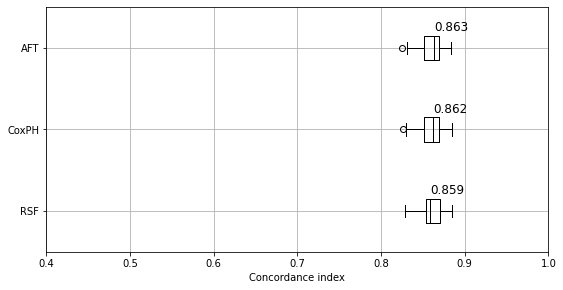

In [ ]:
df = pd.DataFrame([C_Idx1, C_Idx2,C_Idx3], index=['AFT', 'CoxPH', 'RSF'])
df2 = df.transpose()

colors = ['#000000', '#000000', '#ff7f00']
colors_setosa = dict(color=colors[0])
colors_versicolor = dict(color=colors[1])
colors_versicolor2 = dict(color=colors[2])

aft_median = np.median(df2['AFT'])
cox_median = np.median(df2['CoxPH'])
rsf_median = np.median(df2['RSF'])
aft_std = np.std(df2['AFT'])
cox_std = np.std(df2['CoxPH'])
rsf_std = np.std(df2['RSF'])

fig, ax = plt.subplots(figsize=(9,4.5))
ax = df2.boxplot(column=[ 'RSF', 'CoxPH', 'AFT'], vert=False, color = 'k')
plt.annotate(str(np.round(aft_median,3)), xy=(aft_median, 0.8)
                , xytext=(aft_median, 3.205) , fontsize=12)
plt.annotate(str(np.round(cox_median,3)), xy=(aft_median, 0.8)
                , xytext=(cox_median, 2.205) , fontsize=12)
plt.annotate(str(np.round(rsf_median,3)), xy=(aft_median, 0.8)
                , xytext=(rsf_median, 1.205) , fontsize=12)
plt.xlim([0.4,1.0])
plt.xlabel('Concordance index')
plt.show()

In [ ]:
print(aft_median)
print(cox_median)
print(rsf_median)
print(aft_std)
print(cox_std)
print(rsf_std)

0.8633201660992307
0.8623348874640666
0.8586286138449915
0.013254301918176736
0.01314295316390434
0.012795052165606379


# 2) D-calibration in CV frame

In [ ]:
from lifelines import WeibullAFTFitter
from lifelines import CoxPHFitter

In [ ]:
from sksurv.ensemble import RandomSurvivalForest

In [ ]:
aft = WeibullAFTFitter(penalizer = 0.01, l1_ratio = 1)
aft.fit(df_train[aft_final_feature_list+['time_opt', 'status_opt']], duration_col='time_opt', event_col='status_opt', ancillary=False)


<lifelines.WeibullAFTFitter: fitted with 2827 total observations, 2198 right-censored observations>

In [ ]:
cph = CoxPHFitter(penalizer=0.01, l1_ratio = 1)
cph.fit(df_train[cph_final_feature_list+['time_opt', 'status_opt']], 'time_opt', event_col='status_opt')

<lifelines.CoxPHFitter: fitted with 2827 total observations, 2198 right-censored observations>

In [ ]:
rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=8,
                           min_samples_leaf=14,
                           max_features="auto",
                           n_jobs=-1,
                           random_state=20)
rsf.fit(df_train[rsf_final_feature_list], y_train_rsf)

RandomSurvivalForest(min_samples_leaf=14, min_samples_split=8, n_jobs=-1,
                     random_state=20)

In [ ]:
df_occurred =df_train.query('status_opt == 1')
df_censored =df_train.query('status_opt == 0')

print("There are", len(df_occurred), "uncensored and", len(df_censored), "censored data")

There are 629 uncensored and 2198 censored data


In [ ]:
#4분 50초 소요
def d_calibration_table(model, data, feature_list):
  global bin_cs
  df_occurred = data.query('status_opt == 1')
  df_censored = data.query('status_opt == 0')
  calibration = pd.DataFrame(np.zeros((2, 10)))
  calibration.index = ['Occurred', 'Censored']
  calibration.columns = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
  
  if model == rsf:
    for i in range(len(df_occurred)):
      result = np.squeeze(model.predict_survival_function(df_occurred[feature_list].iloc[i, :].to_numpy().reshape(1, -1), return_array = True))
      time_result = pd.DataFrame({'time' : rsf.event_times_, 'p' : result })
      probability = time_result.iloc[(time_result['time']-df_occurred.iloc[i, :]['time_opt']).abs().argsort()[:1]].iloc[0,1]
      if probability == 1:
        bin = 90
      else:
        bin = math.floor(probability*10)*10
      
      calibration.loc['Occurred'][bin] = calibration.loc['Occurred'][bin]+1

    for j in range(len(df_censored)):
      result_cs = np.squeeze(model.predict_survival_function(df_censored[feature_list].iloc[j, :].to_numpy().reshape(1, -1), return_array = True))
      time_result_cs = pd.DataFrame({'time' : rsf.event_times_, 'p' : result_cs })
      probability_cs = time_result_cs.iloc[(time_result_cs['time']-df_censored.iloc[j, :]['time_opt']).abs().argsort()[:1]].iloc[0,1]
      if probability_cs == 1:
        bins_cs = 90
      else :
        bin_cs = math.floor(probability_cs*10)*10
      calibration.loc['Censored'][bin_cs] = calibration.loc['Censored'][bin_cs]+(1-(0.01*bin_cs/probability_cs))

      for k in range(0,bin_cs,10):
        calibration.loc['Censored'][k] = calibration.loc['Censored'][k]+(0.1/probability_cs)

  else :
    for i in range(len(df_occurred)):
      pred_curve = model.predict_survival_function(df_occurred[feature_list].iloc[i, :]).reset_index()
      probability = pred_curve.iloc[(pred_curve['index']-df_occurred.iloc[i, :]['time_opt']).abs().argsort()[:1]].iloc[0,1]
      if probability == 1:
        bin=90
      else:
        bin = math.floor(probability*10)*10
      calibration.loc['Occurred'][bin] = calibration.loc['Occurred'][bin]+1

    for j in range(len(df_censored)):
      pred_curve_cs = model.predict_survival_function(df_censored[feature_list].iloc[j, :]).reset_index()
      probability_cs = pred_curve_cs.iloc[(pred_curve_cs['index']-df_censored.iloc[j, :]['time_opt']).abs().argsort()[:1]].iloc[0,1] 
      if probability_cs == 1:
        bins_cs = 90
      else :
        bin_cs = math.floor(probability_cs*10)*10
      calibration.loc['Censored'][bin_cs] = calibration.loc['Censored'][bin_cs]+(1-(0.01*bin_cs/probability_cs))

      for k in range(0,bin_cs,10):
        calibration.loc['Censored'][k] = calibration.loc['Censored'][k]+(0.1/probability_cs)

  calibration = np.transpose(calibration)
  calibration['Total'] = calibration['Occurred'] + calibration['Censored']
  quantile_list = ['[0%-10%)','[10%-20%)','[20%-30%)','[30%-40%)','[40%-50%)','[50%-60%)','[60%-70%)','[70%-80%)','[80%-90%)','[90%-100%]']
  calibration.index = quantile_list
  return calibration

In [ ]:
from scipy.stats import chisquare

In [ ]:
def chi_test(table, data):
  chi_df = (table/len(data)*100)[['Total']]
  chi_df['exp'] = 10
  chi_df.columns = ['obs', 'exp']
  chi_df = np.transpose(chi_df)
  chi_result = chisquare(np.array(chi_df.loc['obs']))
  
  return chi_result

In [ ]:
chi_test(d_calibration_table(cph, df_train, cph_final_feature_list), df_train)[1]

0.9999214763212411

In [ ]:
chi_test(d_calibration_table(aft, df_train_aft.iloc[1356:1808,:], aft_final_feature_list), df_train_aft.iloc[1356:1808,:])

Power_divergenceResult(statistic=1.4895609042980942, pvalue=0.9972234739854112)

In [ ]:
#6분 소요
aft = WeibullAFTFitter(penalizer = 0.01, l1_ratio = 1)
Chi_stats_aft = np.array([])
p_val_aft = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]

for i in random_num_list:
    df_train_aft = df_train[aft_final_feature_list+['time_opt', 'status_opt']].sample(n=len(df_train), random_state=i)
    
    aft.fit(df_train_aft.iloc[0:2261,:], 'time_opt', event_col='status_opt')
    chi_1 = chi_test(d_calibration_table(aft, df_train_aft.iloc[2261:, :], aft_final_feature_list), df_train_aft.iloc[2261:, :])
       
    aft.fit(df_train_aft.iloc[565:,:], 'time_opt', event_col='status_opt')
    chi_2 = chi_test(d_calibration_table(aft, df_train_aft.iloc[0:565,:], aft_final_feature_list), df_train_aft.iloc[0:565,:])

    aft.fit(pd.concat([df_train_aft.iloc[0:565],df_train_aft.iloc[1130:]]), 'time_opt', event_col='status_opt')
    chi_3 = chi_test(d_calibration_table(aft, df_train_aft.iloc[565:1130,:], aft_final_feature_list), df_train_aft.iloc[565:1130,:])

    aft.fit(pd.concat([df_train_aft.iloc[0:1130],df_train_aft.iloc[1695:]]), 'time_opt', event_col='status_opt')
    chi_4 = chi_test(d_calibration_table(aft, df_train_aft.iloc[1130:1695,:], aft_final_feature_list), df_train_aft.iloc[1130:1695,:])

    aft.fit(pd.concat([df_train_aft.iloc[0:1695],df_train_aft.iloc[2261:]]), 'time_opt', event_col='status_opt')
    chi_5 = chi_test(d_calibration_table(aft, df_train_aft.iloc[1695:2261,:], aft_final_feature_list), df_train_aft.iloc[1695:2261,:])
    
    Chi_stats_aft = np.append (Chi_stats_aft, [chi_1[0], chi_2[0], chi_3[0], chi_4[0], chi_5[0]])
    p_val_aft = np.append (p_val_aft, [chi_1[1], chi_2[1], chi_3[1], chi_4[1], chi_5[1]])
print(Chi_stats_aft)
print(p_val_aft)

[1.39079008 0.48606365 1.75138981 1.50426315 0.40628901 0.95535715
 1.10154222 1.40042524 0.30535428 1.18085903 1.3225323  1.45639352
 0.69037844 1.44082427 0.72042602 0.894998   0.64701171 0.82863978
 0.4874865  1.02503997 0.79777477 0.42389883 1.59493706 0.93494172
 0.34739699 0.57081751 0.98207927 1.0687326  1.91992355 0.51518062
 0.54008585 0.76058648 1.05704807 0.70730828 1.15046124 0.8256747
 1.5373656  0.38257507 0.32785028 1.40713732 0.64059763 0.28236399
 0.92466727 0.87607017 1.9102088  1.37360998 0.62947961 0.62357545
 0.66749161 0.69696244]
[0.99787876 0.99997305 0.99481709 0.99711502 0.99998758 0.99953368
 0.99916562 0.99782026 0.99999642 0.99889492 0.9982617  0.99745752
 0.99987968 0.99756242 0.99985601 0.99964378 0.99990855 0.99974129
 0.99997271 0.9993776  0.99977918 0.99998507 0.99637928 0.99957337
 0.99999371 0.99994633 0.9994777  0.99926209 0.99267147 0.9999654
 0.99995764 0.99981917 0.99929439 0.99986673 0.99900521 0.99974513
 0.99685996 0.99999043 0.99999511 0.9977

In [ ]:
#6분 40초
cph = CoxPHFitter(penalizer = 0.01, l1_ratio = 1)
Chi_stats_cph = np.array([])
p_val_cph = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]

for i in random_num_list:
    df_train_cph = df_train[cph_final_feature_list+['time_opt', 'status_opt']].sample(n=len(df_train), random_state=i)
    
    cph.fit(df_train_cph.iloc[0:2261,:], 'time_opt', event_col='status_opt')
    chi_1 = chi_test(d_calibration_table(cph, df_train_cph.iloc[2261:, :], cph_final_feature_list), df_train_cph.iloc[2261:, :])
       
    cph.fit(df_train_cph.iloc[565:,:], 'time_opt', event_col='status_opt')
    chi_2 = chi_test(d_calibration_table(cph, df_train_cph.iloc[0:565,:], cph_final_feature_list), df_train_cph.iloc[0:565,:])

    cph.fit(pd.concat([df_train_cph.iloc[0:565],df_train_cph.iloc[1130:]]), 'time_opt', event_col='status_opt')
    chi_3 = chi_test(d_calibration_table(cph, df_train_cph.iloc[565:1130,:], cph_final_feature_list), df_train_cph.iloc[565:1130,:])

    cph.fit(pd.concat([df_train_cph.iloc[0:1130],df_train_cph.iloc[1695:]]), 'time_opt', event_col='status_opt')
    chi_4 = chi_test(d_calibration_table(cph, df_train_cph.iloc[1130:1695,:], cph_final_feature_list), df_train_cph.iloc[1130:1695,:])

    cph.fit(pd.concat([df_train_cph.iloc[0:1695],df_train_cph.iloc[2261:]]), 'time_opt', event_col='status_opt')
    chi_5 = chi_test(d_calibration_table(cph, df_train_cph.iloc[1695:2261,:], cph_final_feature_list), df_train_cph.iloc[1695:2261,:])
    
    Chi_stats_cph = np.append (Chi_stats_cph, [chi_1[0], chi_2[0], chi_3[0], chi_4[0], chi_5[0]])
    p_val_cph = np.append (p_val_cph, [chi_1[1], chi_2[1], chi_3[1], chi_4[1], chi_5[1]])
print(Chi_stats_cph)
print(p_val_cph)

[1.44552871 0.35019    2.15013091 1.71544343 0.64509129 0.98580292
 0.95424102 1.29931115 0.4790477  1.00838926 1.3176049  1.27078436
 0.68686133 1.3993318  1.04898894 0.59764986 1.02586158 0.65452452
 0.61816994 0.82423464 1.02651071 0.58929738 1.74714576 0.95598745
 0.53453239 0.44012808 1.02225252 0.63016035 1.88308855 0.62317247
 0.62739934 0.58382521 1.10727688 1.08499227 1.15316059 0.87442215
 1.58684674 0.43110604 0.50460268 1.35368777 0.92988826 0.26775327
 0.72108724 0.80917215 2.36299812 1.61161471 0.55277445 0.61910748
 0.54372099 0.65805775]
[0.99753105 0.99999349 0.98886475 0.99521078 0.99990969 0.99946953
 0.99953592 0.99837987 0.99997468 0.99941793 0.99828728 0.99851702
 0.99988224 0.99782695 0.99931606 0.99993472 0.99937556 0.99990396
 0.99992464 0.99974698 0.99937394 0.99993852 0.9948647  0.99953241
 0.99995947 0.99998243 0.99938449 0.99991823 0.99318426 0.99992201
 0.99991974 0.99994091 0.99914787 0.99921536 0.99899575 0.9996765
 0.99644975 0.99998394 0.99996834 0.998

In [ ]:
#2시간 소요
from sksurv.ensemble import RandomSurvivalForest
Chi_stats_rsf = np.array([])
p_val_rsf = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]
rsf = RandomSurvivalForest(n_estimators=100,    min_samples_split=8,   min_samples_leaf=14,
                           max_features="auto",   n_jobs=-1, random_state=20)
for i in random_num_list:
    df_train_rsf = df_train_finalrsf2.sample(n=len(df_train), random_state=i)
    
    y_train_rsf_1 = np.array(list(tuple(x) for x in df_train_rsf.iloc[:2261,-2:].to_records(index=False)), dtype=dt)
    y_test_rsf_1 = np.array(list(tuple(x) for x in df_train_rsf.iloc[2261:,-2:].to_records(index=False)), dtype=dt)
    
    y_train_rsf_2 = np.array(list(tuple(x) for x in df_train_rsf.iloc[565:,-2:].to_records(index=False)), dtype=dt)
    y_test_rsf_2 = np.array(list(tuple(x) for x in df_train_rsf.iloc[0:565,-2:].to_records(index=False)), dtype=dt)
    
    y_train_rsf_3 = np.array(list(tuple(x) for x in pd.concat([df_train_rsf.iloc[0:565,-2:],df_train_rsf.iloc[1130:,-2:]]).to_records(index=False)), dtype=dt)
    y_test_rsf_3 = np.array(list(tuple(x) for x in df_train_rsf.iloc[565:1130,-2:].to_records(index=False)), dtype=dt)
    
    y_train_rsf_4 = np.array(list(tuple(x) for x in pd.concat([df_train_rsf.iloc[0:1130,-2:],df_train_rsf.iloc[1695:,-2:]]).to_records(index=False)), dtype=dt)
    y_test_rsf_4 = np.array(list(tuple(x) for x in df_train_rsf.iloc[1130:1695,-2:].to_records(index=False)), dtype=dt)
    
    y_train_rsf_5 = np.array(list(tuple(x) for x in pd.concat([df_train_rsf.iloc[0:1695,-2:],df_train_rsf.iloc[2261:,-2:]]).to_records(index=False)), dtype=dt)
    y_test_rsf_5 = np.array(list(tuple(x) for x in df_train_rsf.iloc[1695:2261,-2:].to_records(index=False)), dtype=dt)
    
    
    rsf.fit(df_train_rsf.iloc[0:2261,:-2], y_train_rsf_1)
    chi_1 = chi_test(d_calibration_table(rsf, df_train_rsf.iloc[2261:, :], rsf_final_feature_list), df_train_rsf.iloc[2261:, :])
    
    rsf.fit(df_train_rsf.iloc[565:,:-2], y_train_rsf_2)
    chi_2 = chi_test(d_calibration_table(rsf, df_train_rsf.iloc[0:565,:], rsf_final_feature_list), df_train_rsf.iloc[0:565,:])
    
    rsf.fit(pd.concat([df_train_rsf.iloc[0:565,:-2],df_train_rsf.iloc[1130:,:-2]]), y_train_rsf_3)
    chi_3 = chi_test(d_calibration_table(rsf, df_train_rsf.iloc[565:1130,:], rsf_final_feature_list), df_train_rsf.iloc[565:1130,:])
    
    rsf.fit(pd.concat([df_train_rsf.iloc[0:1130,:-2],df_train_rsf.iloc[1695:,:-2]]), y_train_rsf_4)
    chi_4 = chi_test(d_calibration_table(rsf, df_train_rsf.iloc[1130:1695,:], rsf_final_feature_list), df_train_rsf.iloc[1130:1695,:])
    
    rsf.fit(pd.concat([df_train_rsf.iloc[0:1695,:-2],df_train_rsf.iloc[2261:,:-2]]), y_train_rsf_5)
    chi_5 = chi_test(d_calibration_table(rsf, df_train_rsf.iloc[1695:2261,:], rsf_final_feature_list), df_train_rsf.iloc[1695:2261,:])
    
    Chi_stats_rsf = np.append (Chi_stats_rsf, [chi_1[0], chi_2[0], chi_3[0], chi_4[0], chi_5[0]])
    p_val_rsf = np.append (p_val_rsf, [chi_1[1], chi_2[1], chi_3[1], chi_4[1], chi_5[1]])
print(Chi_stats_rsf)
print(p_val_rsf)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names,

[0.48379297 0.52054523 2.30454508 0.8913162  0.24588944 0.7450954
 0.37690172 1.25532138 0.47379231 0.49231199 0.37167879 0.600481
 0.64004608 0.54930437 0.78739821 0.52559396 0.31802292 0.42291678
 0.29077963 0.40898085 0.49210241 0.85861867 1.07939034 0.22894987
 0.17050858 0.21712088 0.36763812 0.63074731 1.50351538 0.40017548
 0.38858238 0.43390159 0.72019941 0.30007593 0.94354626 0.59099743
 0.65528443 0.24985764 0.35103927 0.32677723 0.27736187 0.45406878
 0.34293159 0.22989483 2.5035965  0.34664376 0.19158516 0.55760572
 0.43546427 0.40955443]
[0.99997359 0.99996382 0.98568649 0.99964981 0.99999862 0.99983412
 0.99999103 0.99858777 0.99997586 0.99997153 0.99999156 0.99993339
 0.99991265 0.99995445 0.99979094 0.99996229 0.99999572 0.99998522
 0.99999711 0.99998721 0.99997158 0.99970008 0.9992317  0.99999899
 0.99999973 0.9999992  0.99999195 0.99991791 0.99712061 0.99998837
 0.99998976 0.99998348 0.9998562  0.99999668 0.99955696 0.99993776
 0.99990349 0.99999851 0.99999342 0.99999

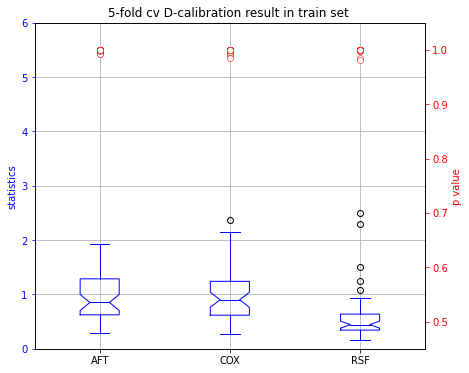

In [ ]:
stats = pd.DataFrame([Chi_stats_aft, Chi_stats_cph, Chi_stats_rsf], index=['AFT', 'COX','RSF']).transpose()

p_aft =pd.DataFrame([p_val_aft], index=['significance']).transpose()
p_aft['model']=1
p_cph =pd.DataFrame([p_val_cph], index=['significance']).transpose()
p_cph['model']=2
p_rsf =pd.DataFrame([p_val_rsf], index=['significance']).transpose()
p_rsf['model']=3

fig, ax = plt.subplots(figsize=(7,6))
ax= stats.boxplot(column=['AFT','COX','RSF'], color = 'b', notch=True, )
ax2 = ax.twinx()
ax2.scatter(x="model", y='significance',  data=p_aft, color='w', edgecolor='r', linewidths=0.5)
ax2.scatter(x="model", y='significance',  data=p_cph, color='w', edgecolor='r', linewidths=0.5)
ax2.scatter(x="model", y='significance',  data=p_rsf, color='w', edgecolor='r', linewidths=0.5)

ax2.set_ylim([0.45,1.05])
ax2.set_ylabel('p value', color='r')
[t.set_color('red') for t in ax2.yaxis.get_ticklines()]
[t.set_color('red') for t in ax2.yaxis.get_ticklabels()]
ax.set_ylim([0,6])
ax.set_ylabel('statistics', color='b')
[t.set_color('blue') for t in ax.yaxis.get_ticklines()]
[t.set_color('blue') for t in ax.yaxis.get_ticklabels()]
plt.title('5-fold cv D-calibration result in train set ')
plt.show()

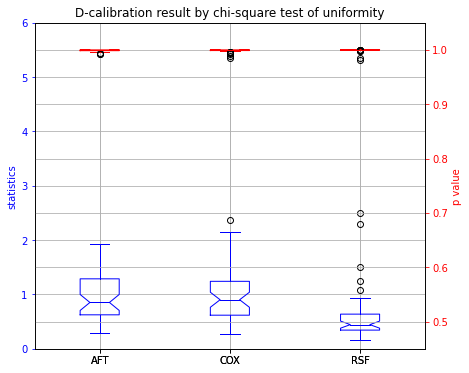

In [ ]:
stats = pd.DataFrame([Chi_stats_aft, Chi_stats_cph, Chi_stats_rsf], index=['AFT', 'COX','RSF']).transpose()
p = pd.DataFrame([p_val_aft, p_val_cph, p_val_rsf], index=['AFT', 'COX','RSF']).transpose()

fig, ax = plt.subplots(figsize=(7,6))
ax= stats.boxplot(column=['AFT','COX','RSF'], color = 'b', notch=True)
ax2 = ax.twinx()
ax2 = p.boxplot(column=['AFT','COX','RSF'], color = 'r', notch=True)

ax2.set_ylim([0.45,1.05])
ax2.set_ylabel('p value', color='r')
[t.set_color('red') for t in ax2.yaxis.get_ticklines()]
[t.set_color('red') for t in ax2.yaxis.get_ticklabels()]
ax.set_ylim([0,6])
ax.set_ylabel('statistics', color='b')
[t.set_color('blue') for t in ax.yaxis.get_ticklines()]
[t.set_color('blue') for t in ax.yaxis.get_ticklabels()]
plt.title('D-calibration result by chi-square test of uniformity')
plt.show()

#3) Integrated Brier score in CV frame

In [17]:
from sklearn.model_selection import train_test_split
from sksurv.functions import StepFunction
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import integrated_brier_score
from sksurv.nonparametric import kaplan_meier_estimator

In [19]:
dic = {1:True, 0:False}
dt = np.dtype('bool, float')

y = df_train[['status_opt', 'time_opt']].replace({'status_opt':dic})
y = np.array(list(tuple(x) for x in y.to_records(index=False)), dtype = dt)
y.dtype.names=['cens', 'time']
y

array([(False, 13.18), ( True,  9.44), (False,  5.06), ...,
       (False, 12.82), (False,  6.05), (False,  4.14)],
      dtype=[('cens', '?'), ('time', '<f8')])

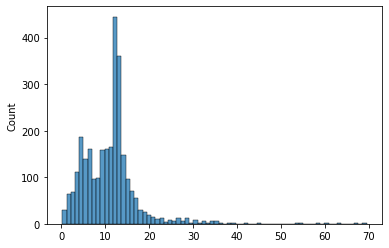

In [20]:
sns.histplot(y["time"])

In [21]:
def model_surv_prob(predicted_result, times):
  prob = np.row_stack([
    StepFunction(
        np.array(predicted_result.columns), np.array(predicted_result.iloc[i,:])
    )(times) 
    for i in range(len(predicted_result))
  ])

  return prob

In [22]:
#22분 소요
# time range fixed (1~30)
from sklearn.model_selection import RepeatedKFold

aft_ibs = []
cph_ibs = []
rsf_ibs = []
km_ibs = []
random_ibs = []

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=22)
for train_index, test_index in rkf.split(df_train):
  X_y_train, X_y_test = df_train.iloc[train_index], df_train.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]

  times = np.arange(1,30, 0.01)
  

  aft = WeibullAFTFitter(penalizer = 0.01, l1_ratio = 1)
  aft.fit(X_y_train[aft_final_feature_list+['time_opt', 'status_opt']], duration_col='time_opt', event_col='status_opt', ancillary=False)
  aft_predicted = aft.predict_survival_function(X_y_test[aft_final_feature_list]).transpose()
  aft_surv_prob = model_surv_prob(aft_predicted, times)
  aft_ibs.append(integrated_brier_score(y, y_test, aft_surv_prob, times))
  
  cph = CoxPHFitter(penalizer=0.01, l1_ratio = 1)
  cph.fit(X_y_train[cph_final_feature_list+['time_opt', 'status_opt']], 'time_opt', event_col='status_opt')
  cph_predicted = cph.predict_survival_function(X_y_test[cph_final_feature_list]).transpose()
  cph_surv_prob = model_surv_prob(cph_predicted, times)
  cph_ibs.append(integrated_brier_score(y, y_test, cph_surv_prob, times))

  rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=8,
                           min_samples_leaf=14,
                           max_features="auto",
                           n_jobs=-1,
                           random_state=20)
  rsf.fit(X_y_train[rsf_final_feature_list], y_train)
  rsf_predicted = pd.DataFrame(data = rsf.predict_survival_function(X_y_test[rsf_final_feature_list], return_array = True),
             columns = rsf.event_times_)
  rsf_predicted.insert(0, 0.23, 1)
  rsf_predicted[69.50] = rsf_predicted.iloc[:,-1]
  rsf_surv_prob = model_surv_prob(rsf_predicted, times)
  rsf_ibs.append(integrated_brier_score(y, y_test, rsf_surv_prob, times))

  km_func = StepFunction(
    *kaplan_meier_estimator(y_test["cens"], y_test["time"])
  )
  km_surv_prob = np.tile(km_func(times), (y_test.shape[0], 1))
  km_ibs.append(integrated_brier_score(y, y_test, km_surv_prob, times))

  random_surv_prob = 0.5 * np.ones(
    (y_test.shape[0], times.shape[0])
  )
  random_ibs.append(integrated_brier_score(y, y_test, random_surv_prob, times))



In [23]:
print(aft_ibs)
print(cph_ibs)
print(rsf_ibs)
print(km_ibs)
print(random_ibs)

[0.09634942754232122, 0.11863833733555423, 0.1217319243857201, 0.14657879726204429, 0.12188760172967357, 0.12325598154760968, 0.1214207826730549, 0.13944599463482632, 0.11933178101248433, 0.10873507906035179, 0.13888519047078848, 0.11169472409388574, 0.13851502800175955, 0.10386296745756006, 0.12101400561634286, 0.13321470422487316, 0.12633949984930154, 0.14575240884711707, 0.12084123061068805, 0.08033840084621605, 0.1139393959432732, 0.11838228972601389, 0.1254745940887823, 0.13091290650875023, 0.11494869098408214, 0.13046093889468827, 0.1078128669880322, 0.12501329123684435, 0.1182998590205806, 0.1274676322839986, 0.14357470590737517, 0.0985734789838692, 0.137738514178, 0.1130990771774293, 0.11623986036777177, 0.10429012215955337, 0.12275040706928103, 0.1448942692267245, 0.10970098560833373, 0.1235315886921985, 0.11263634870050553, 0.13111105000937498, 0.0964295694212226, 0.11719577169493439, 0.1524398493608694, 0.07657732829592065, 0.13180745407834668, 0.13548606743554528, 0.1311781

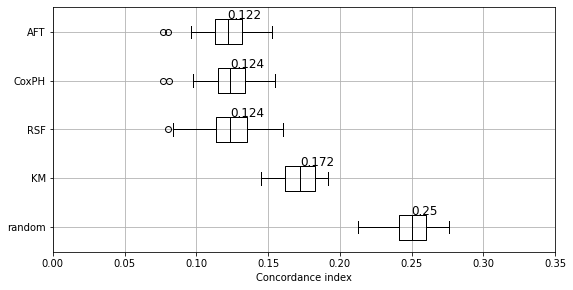

In [24]:
df = pd.DataFrame([aft_ibs, cph_ibs,rsf_ibs,km_ibs,random_ibs], index=['AFT', 'CoxPH', 'RSF', 'KM', 'random'])
df2 = df.transpose()

colors = ['#000000', '#000000', '#ff7f00']
colors_setosa = dict(color=colors[0])
colors_versicolor = dict(color=colors[1])
colors_versicolor2 = dict(color=colors[2])

aft_median = np.median(df2['AFT'])
cox_median = np.median(df2['CoxPH'])
rsf_median = np.median(df2['RSF'])
km_median = np.median(df2['KM'])
random_median = np.median(df2['random'])
aft_std = np.std(df2['AFT'])
cox_std = np.std(df2['CoxPH'])
rsf_std = np.std(df2['RSF'])
km_std = np.std(df2['KM'])
random_std = np.std(df2['random'])

fig, ax = plt.subplots(figsize=(9,4.5))
ax = df2.boxplot(column=['random', 'KM', 'RSF', 'CoxPH', 'AFT'], vert=False, color = 'k')
plt.annotate(str(np.round(aft_median,3)), xy=(aft_median, 0.8)
                , xytext=(aft_median, 5.25) , fontsize=12)
plt.annotate(str(np.round(cox_median,3)), xy=(aft_median, 0.8)
                , xytext=(cox_median, 4.25) , fontsize=12)
plt.annotate(str(np.round(rsf_median,3)), xy=(aft_median, 0.8)
                , xytext=(rsf_median, 3.25) , fontsize=12)
plt.annotate(str(np.round(km_median,3)), xy=(aft_median, 0.8)
                , xytext=(km_median, 2.25) , fontsize=12)
plt.annotate(str(np.round(random_median,3)), xy=(aft_median, 0.8)
                , xytext=(random_median, 1.25) , fontsize=12)

plt.xlim([0.0, 0.35])
plt.xlabel('Concordance index')
plt.show()

# 4) Average survival curve

In [26]:
aft.fit(df_train[aft_final_feature_list+['time_opt', 'status_opt']], duration_col='time_opt', event_col='status_opt', ancillary=False)
cph.fit(df_train[cph_final_feature_list+['time_opt', 'status_opt']], 'time_opt', event_col='status_opt')
rsf.fit(df_train[rsf_final_feature_list], y)

RandomSurvivalForest(min_samples_leaf=14, min_samples_split=8, n_jobs=-1,
                     random_state=20)

### (1) Categorizing patient data

In [27]:
aft_median = pd.concat([df_train['SubjectID'],aft.predict_percentile(df_train[aft_final_feature_list], ancillary=None, p=0.5)], axis=1)
aft_median

,SubjectID,0
0,348.0,42.426623
1,533.0,8.292071
2,902.0,24.737826
3,1736.0,13.612557
4,3971.0,38.571307
...,...,...
2822,998542.0,27.428922
2823,998756.0,14.858222
2824,999166.0,29.067701
2825,999823.0,17.230965


In [28]:
print('There are ' + str(aft_median.replace([np.inf,-np.inf], np.nan).isnull().sum(axis = 0).iloc[1]) + ' inf values in aft_median')

There are 0 inf values in aft_median


In [29]:
aft_median[0].describe()

count    2827.000000
mean       30.331934
std        16.758641
min         1.239167
25%        18.010295
50%        29.093249
75%        40.392912
max       345.126502
Name: 0, dtype: float64

In [30]:
aft_slow_list = list(aft_median[aft_median[0] >= 	40.392912]['SubjectID'])
aft_intermediate_list = list(aft_median[(aft_median[0] >= 18.010295) & (aft_median[0] < 	40.392912)]['SubjectID'])
aft_rapid_list = list(aft_median[aft_median[0]  < 18.010295]['SubjectID'])
X_aft_slow = df_train[df_train['SubjectID'].isin(aft_slow_list)]
X_aft_intermediate = df_train[df_train['SubjectID'].isin(aft_intermediate_list)]
X_aft_rapid = df_train[df_train['SubjectID'].isin(aft_rapid_list)]

In [31]:
result_aft_slow = pd.DataFrame(aft.predict_survival_function(X_aft_slow[aft_final_feature_list].iloc[:,:]).mean(axis=1))
result_aft_intermediate = pd.DataFrame(aft.predict_survival_function(X_aft_intermediate[aft_final_feature_list].iloc[:,:]).mean(axis=1))
result_aft_rapid = pd.DataFrame(aft.predict_survival_function(X_aft_rapid[aft_final_feature_list].iloc[:,:]).mean(axis=1))

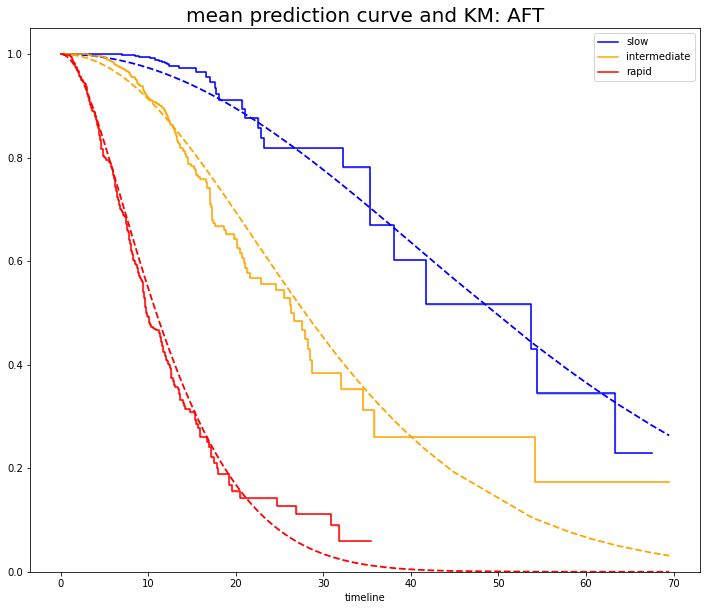

In [32]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

plt.figure(figsize=(12,10))

OPT = kmf.fit(X_aft_slow["time_opt"], X_aft_slow["status_opt"], label='slow', alpha=1)
ax_kmf = OPT.plot(color='blue', linewidth=1.5)
plt.plot(result_aft_slow.index, result_aft_slow[0], marker='None', color='blue', linestyle="--", linewidth=1.8)


OPT = kmf.fit(X_aft_intermediate["time_opt"], X_aft_intermediate["status_opt"], label='intermediate', alpha=1)
ax_kmf = OPT.plot(color='orange', linewidth=1.5)
plt.title("Intermediate")
plt.plot(result_aft_intermediate.index, result_aft_intermediate[0], marker='None', color='orange', linestyle="--", linewidth=1.8)

OPT = kmf.fit(X_aft_rapid["time_opt"], X_aft_rapid["status_opt"], label='rapid', alpha=1)
ax_kmf = OPT.plot(color='red', linewidth=1.5)
plt.plot(result_aft_rapid.index, result_aft_rapid[0], marker='None', color='red', linestyle="--", linewidth=1.8)
plt.ylim([0,1.05])

plt.title('mean prediction curve and KM: AFT', fontsize=20)

plt.show()

In [33]:
cph_median = pd.concat([df_train['SubjectID'],cph.predict_percentile(df_train[cph_final_feature_list], p=0.5)], axis=1)
cph_median

,SubjectID,0.5
0,348.0,54.15
1,533.0,8.52
2,902.0,28.24
3,1736.0,13.08
4,3971.0,53.69
...,...,...
2822,998542.0,32.22
2823,998756.0,14.33
2824,999166.0,35.28
2825,999823.0,16.73


In [34]:
print('There are ' + str(cph_median.replace([np.inf,-np.inf], np.nan).isnull().sum(axis = 0).iloc[1]) + ' inf values in cph_median')

There are 219 inf values in cph_median


In [35]:
cph_infinity = list(cph_median[cph_median[0.5]==np.inf]['SubjectID'])

In [36]:
function = pd.concat([df_train['SubjectID'],aft.predict_survival_function(df_train[aft_final_feature_list]).transpose()], axis=1)
last_point= function.iloc[:, [0,-1]]
last_point[0.5] = (0.5*last_point.columns[1])/(1-last_point.iloc[:,1])
cph_median_inf = last_point[last_point['SubjectID'].isin(cph_infinity)][['SubjectID',0.5]]
cph_median_inf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SubjectID,0.5
17,7799.0,47.089253
24,9641.0,65.524454
29,10995.0,113.710895
31,11813.0,80.261148
51,17390.0,54.786527
...,...,...
2756,977182.0,49.824647
2775,983209.0,58.993110
2789,990061.0,60.810704
2790,990402.0,55.958816


In [37]:
cph_median = pd.concat([cph_median[cph_median[0.5]!=np.inf],cph_median_inf], axis=0)
cph_median

,SubjectID,0.5
0,348.0,54.150000
1,533.0,8.520000
2,902.0,28.240000
3,1736.0,13.080000
4,3971.0,53.690000
...,...,...
2756,977182.0,49.824647
2775,983209.0,58.993110
2789,990061.0,60.810704
2790,990402.0,55.958816


In [38]:
print('There are ' + str(cph_median.replace([np.inf,-np.inf], np.nan).isnull().sum(axis = 0).iloc[1]) + ' inf values in cph_median after extension')

There are 0 inf values in cph_median after extension


In [39]:
cph_median[0.5].describe()

count    2827.000000
mean       34.102977
std        31.308200
min         1.610000
25%        17.260000
50%        34.490000
75%        53.690000
max      1363.804890
Name: 0.5, dtype: float64

In [40]:
cph_slow_list = list(cph_median[cph_median[0.5] >= 	53.690000]['SubjectID'])
cph_intermediate_list = list(cph_median[(cph_median[0.5] >=  17.260000) & (cph_median[0.5] < 	53.690000)]['SubjectID'])
cph_rapid_list = list(cph_median[cph_median[0.5]  <  17.260000]['SubjectID'])
X_cph_slow = df_train[df_train['SubjectID'].isin(cph_slow_list)]
X_cph_intermediate = df_train[df_train['SubjectID'].isin(cph_intermediate_list)]
X_cph_rapid = df_train[df_train['SubjectID'].isin(cph_rapid_list)]

In [41]:
result_cph_slow = pd.DataFrame(cph.predict_survival_function(X_cph_slow[cph_final_feature_list].iloc[:,:]).mean(axis=1))
result_cph_intermediate = pd.DataFrame(cph.predict_survival_function(X_cph_intermediate[cph_final_feature_list].iloc[:,:]).mean(axis=1))
result_cph_rapid = pd.DataFrame(cph.predict_survival_function(X_cph_rapid[cph_final_feature_list].iloc[:,:]).mean(axis=1))

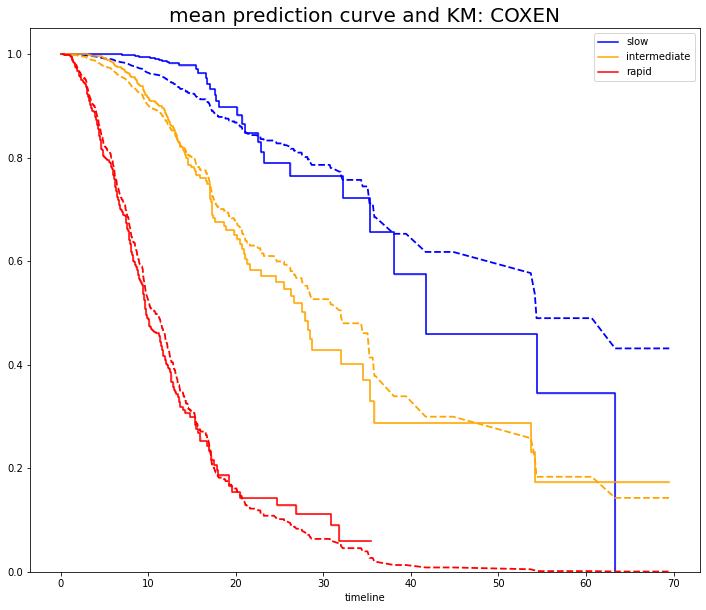

In [42]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

plt.figure(figsize=(12,10))

OPT = kmf.fit(X_cph_slow["time_opt"], X_cph_slow["status_opt"], label='slow', alpha=1)
ax_kmf = OPT.plot(color='blue', linewidth=1.5)
plt.plot(result_cph_slow.index, result_cph_slow[0], marker='None', color='blue', linestyle="--", linewidth=1.8)


OPT = kmf.fit(X_cph_intermediate["time_opt"], X_cph_intermediate["status_opt"], label='intermediate', alpha=1)
ax_kmf = OPT.plot(color='orange', linewidth=1.5)
plt.title("Intermediate")
plt.plot(result_cph_intermediate.index, result_cph_intermediate[0], marker='None', color='orange', linestyle="--", linewidth=1.8)

OPT = kmf.fit(X_cph_rapid["time_opt"], X_cph_rapid["status_opt"], label='rapid', alpha=1)
ax_kmf = OPT.plot(color='red', linewidth=1.5)
plt.plot(result_cph_rapid.index, result_cph_rapid[0], marker='None', color='red', linestyle="--", linewidth=1.8)

plt.ylim([0,1.05])

plt.title('mean prediction curve and KM: COXEN', fontsize=20)

plt.show()

In [43]:
def predict_rsf_percentile(data, percentile):
  result = rsf.predict_survival_function(data.to_numpy().reshape(1, -1), return_array = True)
  result = np.squeeze(result)
  time_result = pd.DataFrame({'time' : rsf.event_times_, 'p' : result })

  if time_result[time_result['p'] <= percentile].count()['time'] == 0:
    per = np.inf
  else:
    per = time_result[time_result['p'] <= percentile].iloc[0,0]

  return per

In [44]:
# Extract 50% probability time
rsf_50_list = []
for i in range(df_train[rsf_final_feature_list].shape[0]):
  rsf_50_list.append(predict_rsf_percentile(df_train[rsf_final_feature_list].iloc[i,:], 0.5))

rsf_50_list

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomSurv

[inf,
 9.44,
 63.32,
 9.44,
 inf,
 19.23,
 15.98,
 14.76,
 inf,
 12.89,
 12.89,
 28.67,
 8.22,
 11.74,
 21.11,
 inf,
 18.84,
 53.69,
 19.23,
 inf,
 inf,
 inf,
 inf,
 63.32,
 inf,
 26.24,
 inf,
 17.06,
 17.65,
 inf,
 14.93,
 17.65,
 63.32,
 inf,
 9.67,
 31.82,
 inf,
 inf,
 15.98,
 17.26,
 32.02,
 17.65,
 12.66,
 16.77,
 9.07,
 22.85,
 34.49,
 14.04,
 27.95,
 13.18,
 inf,
 inf,
 21.63,
 28.24,
 26.66,
 inf,
 16.73,
 13.32,
 inf,
 inf,
 inf,
 20.98,
 14.53,
 inf,
 7.86,
 28.47,
 27.95,
 inf,
 11.31,
 14.14,
 inf,
 63.32,
 inf,
 inf,
 54.35,
 15.45,
 13.68,
 32.02,
 8.98,
 32.02,
 41.69,
 17.06,
 54.15,
 41.69,
 6.81,
 inf,
 63.32,
 inf,
 inf,
 6.58,
 20.19,
 inf,
 15.42,
 inf,
 54.15,
 8.71,
 11.28,
 inf,
 34.49,
 11.31,
 30.84,
 17.03,
 8.75,
 inf,
 35.28,
 18.05,
 inf,
 3.81,
 inf,
 9.67,
 inf,
 12.66,
 9.24,
 14.33,
 inf,
 13.58,
 inf,
 inf,
 17.16,
 inf,
 35.28,
 12.56,
 13.64,
 4.67,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 21.34,
 9.93,
 54.35,
 inf,
 35.84,
 9.04,
 11.05,
 53.69,

In [45]:
subjectID = df_train['SubjectID'].copy()
subjectID.index = range(len(subjectID))
subjectID

0          348.0
1          533.0
2          902.0
3         1736.0
4         3971.0
          ...   
2822    998542.0
2823    998756.0
2824    999166.0
2825    999823.0
2826    999990.0
Name: SubjectID, Length: 2827, dtype: float64

In [46]:
rsf_median = pd.concat([subjectID, pd.Series(rsf_50_list)], axis=1)
rsf_median

,SubjectID,0
0,348.0,inf
1,533.0,9.44
2,902.0,63.32
3,1736.0,9.44
4,3971.0,inf
...,...,...
2822,998542.0,inf
2823,998756.0,11.93
2824,999166.0,35.84
2825,999823.0,17.65


In [47]:
# Check how many subjects have infinity values on median prob time
print('There are ' + str(rsf_median.replace([np.inf,-np.inf], np.nan).isnull().sum(axis = 0).iloc[1]) + ' inf values in rsf_median')
# There are 706 inf values in rsf_median  (302 if leaf is 18)

There are 1039 inf values in rsf_median


In [48]:
rsf_infinity = list(rsf_median[rsf_median[0]==np.inf]['SubjectID'])

In [49]:
rsf_function1 = pd.DataFrame(np.squeeze(rsf.predict_survival_function(df_train[rsf_final_feature_list].iloc[:, :].to_numpy(), return_array = True)))
rsf_function1.columns = rsf.event_times_
rsf_function1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  "X does not have valid feature names, but"


,0.43,1.05,1.15,1.32,1.35,1.38,1.55,1.61,1.64,1.68,...,32.22,34.49,35.28,35.84,38.07,41.69,53.69,54.15,54.35,63.32
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.861336,0.861336,0.805336,0.805336,0.645336,0.645336,0.625336,0.625336,0.615336,0.615336
1,0.994633,0.980978,0.980978,0.968966,0.967264,0.963003,0.962336,0.962336,0.957527,0.956860,...,0.108731,0.108731,0.108731,0.108731,0.108731,0.108731,0.108731,0.108731,0.108731,0.108731
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.544898,0.544898,0.514898,0.514898,0.514898,0.514898,0.504898,0.504898,0.504898,0.474898
3,1.000000,1.000000,0.999600,0.999600,0.998486,0.998486,0.998486,0.994874,0.994374,0.993160,...,0.122517,0.122517,0.122517,0.122517,0.122517,0.122517,0.122517,0.122517,0.122517,0.122517
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.631053,0.621053,0.621053,0.621053,0.621053,0.617488,0.617488,0.607488,0.607488,0.607488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.612231,0.612231,0.606675,0.606675,0.560564,0.560564,0.550564,0.540564,0.540564,0.530564
2823,1.000000,1.000000,1.000000,0.996256,0.996256,0.996256,0.996256,0.996256,0.995667,0.995667,...,0.190955,0.190955,0.190955,0.186498,0.186498,0.186498,0.186498,0.186498,0.186498,0.186498
2824,0.997005,0.996338,0.996338,0.996338,0.995671,0.995671,0.995671,0.995671,0.995671,0.995671,...,0.513455,0.513455,0.508455,0.450284,0.440284,0.440284,0.440284,0.440284,0.430284,0.430284
2825,1.000000,1.000000,0.999412,0.999412,0.999412,0.999412,0.999412,0.998995,0.998578,0.997990,...,0.329021,0.329021,0.329021,0.319761,0.319761,0.319761,0.319761,0.295430,0.285430,0.285430


In [50]:
rsf_function2 = pd.concat([df_train['SubjectID'],rsf_function1], axis=1)
last_point_rsf= rsf_function2.iloc[:, [0,-1]]
last_point_rsf[0] = (0.5*last_point_rsf.columns[1])/(1-last_point_rsf.iloc[:,1])
rsf_median_inf = last_point_rsf[last_point_rsf['SubjectID'].isin(rsf_infinity)][['SubjectID',0]]
rsf_median_inf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SubjectID,0
0,348.0,82.305574
4,3971.0,80.660055
8,4918.0,76.920332
15,7750.0,100.121740
19,8227.0,117.142483
...,...,...
2808,993568.0,66.628810
2812,995584.0,82.679262
2814,996351.0,65.410128
2815,996611.0,100.756949


In [51]:
rsf_median = pd.concat([rsf_median[rsf_median[0]!=np.inf],rsf_median_inf], axis=0)
rsf_median

,SubjectID,0
1,533.0,9.440000
2,902.0,63.320000
3,1736.0,9.440000
5,4752.0,19.230000
6,4796.0,15.980000
...,...,...
2808,993568.0,66.628810
2812,995584.0,82.679262
2814,996351.0,65.410128
2815,996611.0,100.756949


In [52]:
print('There are ' + str(rsf_median.replace([np.inf,-np.inf], np.nan).isnull().sum(axis = 0).iloc[1]) + ' inf values in rsf_median after extension')

There are 0 inf values in rsf_median after extension


In [53]:
rsf_median.describe()

,SubjectID,0
count,2827.000000,2827.000000
mean,503438.308808,46.129235
std,293392.638275,35.069861
min,348.000000,2.930000
25%,249869.500000,15.420000
50%,512439.000000,32.220000
75%,764537.000000,73.607951
max,999990.000000,191.589269


In [54]:
# Categorize into 3 group based on interquartile range
rsf_slow_list = list(rsf_median[rsf_median[0] >= 73.607951]['SubjectID'])
rsf_intermediate_list = list(rsf_median[(rsf_median[0] >= 15.420000) & (rsf_median[0] < 73.607951)]['SubjectID'])
rsf_rapid_list = list(rsf_median[rsf_median[0]  < 15.420000]['SubjectID'])
X_rsf_slow = df_train[df_train['SubjectID'].isin(rsf_slow_list)]
X_rsf_intermediate = df_train[df_train['SubjectID'].isin(rsf_intermediate_list)]
X_rsf_rapid = df_train[df_train['SubjectID'].isin(rsf_rapid_list)]

In [55]:
rsf_pred_slow = np.squeeze(rsf.predict_survival_function(X_rsf_slow[rsf_final_feature_list].iloc[:, :].to_numpy(), return_array = True))
rsf_pred_intermediate = np.squeeze(rsf.predict_survival_function(X_rsf_intermediate[rsf_final_feature_list].iloc[:, :].to_numpy(), return_array = True))
rsf_pred_rapid = np.squeeze(rsf.predict_survival_function(X_rsf_rapid[rsf_final_feature_list].iloc[:, :].to_numpy(), return_array = True))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  "X does not have valid feature names, but"


In [56]:
result_rsf_slow = np.transpose(pd.DataFrame(rsf_pred_slow)).set_index(rsf.event_times_)
result_rsf_intermediate = np.transpose(pd.DataFrame(rsf_pred_intermediate)).set_index(rsf.event_times_)
result_rsf_rapid = np.transpose(pd.DataFrame(rsf_pred_rapid)).set_index(rsf.event_times_)

result_rsf_slow = pd.DataFrame(result_rsf_slow.mean(axis=1))
result_rsf_intermediate = pd.DataFrame(result_rsf_intermediate.mean(axis=1))
result_rsf_rapid =  pd.DataFrame(result_rsf_rapid.mean(axis=1))

31 out of 738


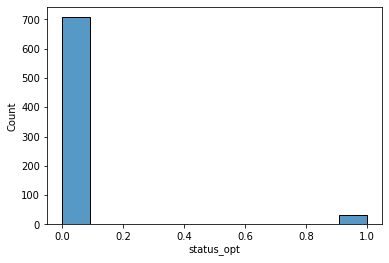

In [57]:
sns.histplot(X_cph_slow['status_opt'])
print(len(X_cph_slow.query('status_opt==1')), 'out of', len(X_cph_slow))

5 out of 707


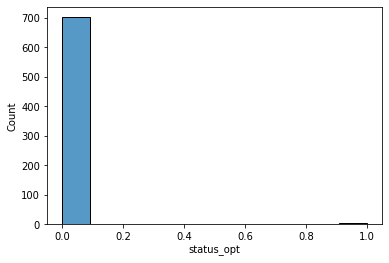

In [58]:
sns.histplot(X_rsf_slow['status_opt'])
print(len(X_rsf_slow.query('status_opt==1')), 'out of', len(X_rsf_slow))

188 out of 1415


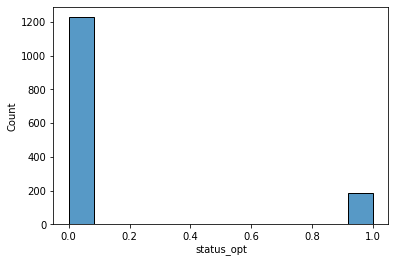

In [59]:
sns.histplot(X_rsf_intermediate['status_opt'])
print(len(X_rsf_intermediate.query('status_opt==1')), 'out of', len(X_rsf_intermediate))

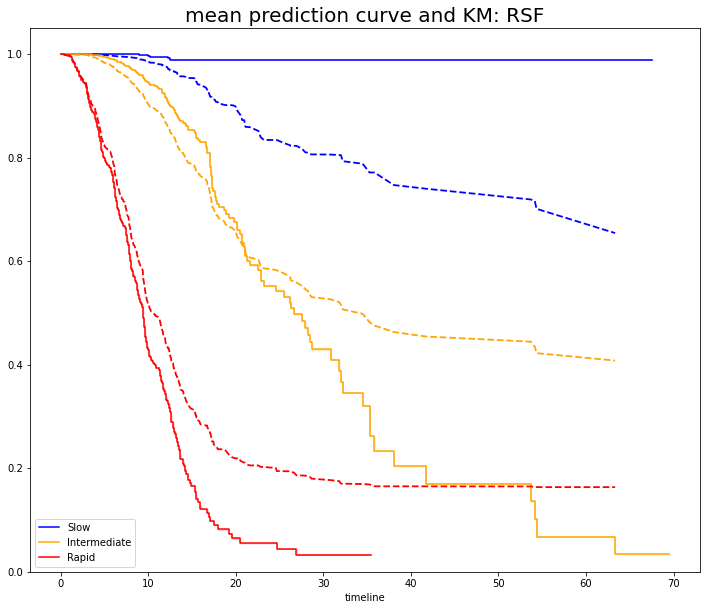

In [60]:
# Compare KM curve and RSF-prediction curve in each group
# KM in solid lines, pred curve in dotted lines
plt.figure(figsize=(12,10))

OPT = kmf.fit(X_rsf_slow["time_opt"], X_rsf_slow["status_opt"], label='Slow', alpha=1)
ax_kmf = OPT.plot(color='blue', linewidth=1.5)
plt.plot(result_rsf_slow.index, result_rsf_slow[0], marker='None', color='blue', linestyle="--", linewidth=1.8)


OPT = kmf.fit(X_rsf_intermediate["time_opt"], X_rsf_intermediate["status_opt"], label='Intermediate', alpha=1)
ax_kmf = OPT.plot(color='orange', linewidth=1.5)
plt.title("Intermediate")
plt.plot(result_rsf_intermediate.index, result_rsf_intermediate[0], marker='None', color='orange', linestyle="--", linewidth=1.8)

OPT = kmf.fit(X_rsf_rapid["time_opt"], X_rsf_rapid["status_opt"], label='Rapid', alpha=1)
ax_kmf = OPT.plot(color='red', linewidth=1.5)
plt.plot(result_rsf_rapid.index, result_rsf_rapid[0], marker='None', color='red', linestyle="--", linewidth=1.8)

plt.ylim([0,1.05])

plt.title('mean prediction curve and KM: RSF', fontsize=20)

plt.show()